<a href="https://colab.research.google.com/github/FilippMaksimov/Net.FeaturesAndModels/blob/main/Models_Maksimov_F_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
print(data.isnull().sum())  # Проверка на пропуски
data.dropna(inplace=True)  # Удаление пропусков
# Кодирование категорий
le = LabelEncoder()
le.fit(data['sex'])

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64


LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 5:7]
y = le.transform(data['sex'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Построение ROC-кривой

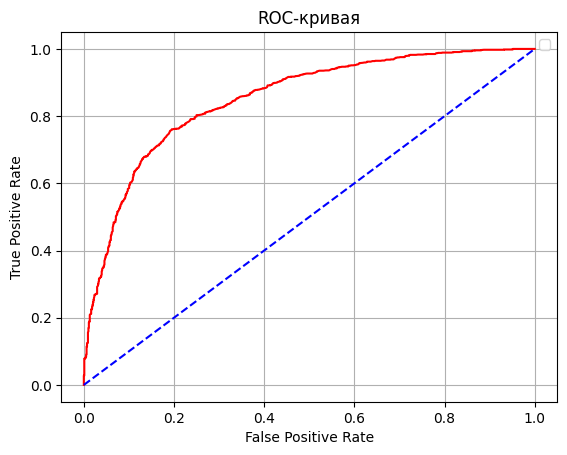

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)
# Прогноз вероятностей для положительного класса
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr, 'r')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid()
plt.show()

#Для дальнейшего сравнения на будущее
fpr_values1 = fpr
tpr_values1 = tpr

Вычисление ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.8505357607237688


Подсчет метрик TPR и FPR

In [ ]:
def calculate_tpr_fpr(y_true, y_scores, threshold):
    TP = sum((y_scores >= threshold) & (y_true == 1))
    FP = sum((y_scores >= threshold) & (y_true == 0))
    FN = sum((y_scores < threshold) & (y_true == 1))
    TN = sum((y_scores < threshold) & (y_true == 0))

    TPR = TP / (TP + FN)  # True Positive Rate
    FPR = FP / (FP + TN)  # False Positive Rate
    return TPR, FPR

In [ ]:
threshold = 0.3  # Пример порога
tpr, fpr = calculate_tpr_fpr(y_test, y_scores, threshold)
print(f'TPR = {tpr}, FPR = {fpr}')

TPR = 0.9234006734006734, FPR = 0.483739837398374


Построение ROC-кривой с помощью вычисленных вручную метрик

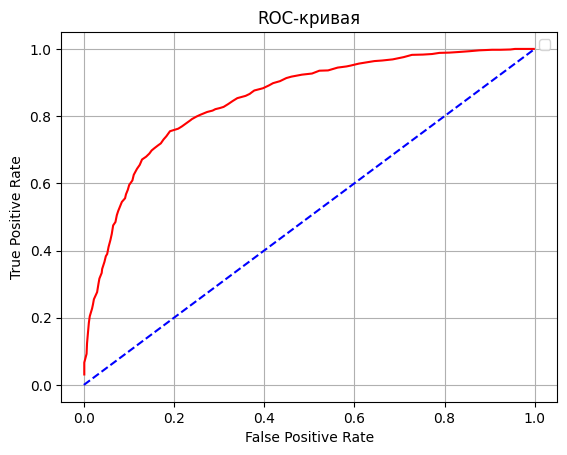

In [ ]:
thresholds = np.arange(0.01, 1.0, 0.01)
tpr_values2 = []
fpr_values2 = []
for threshold in thresholds:
  tpr, fpr = calculate_tpr_fpr(y_test, y_scores, threshold)
  tpr_values2.append(tpr)
  fpr_values2.append(fpr)

plt.plot(fpr_values2, tpr_values2, 'r')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid()
plt.show()

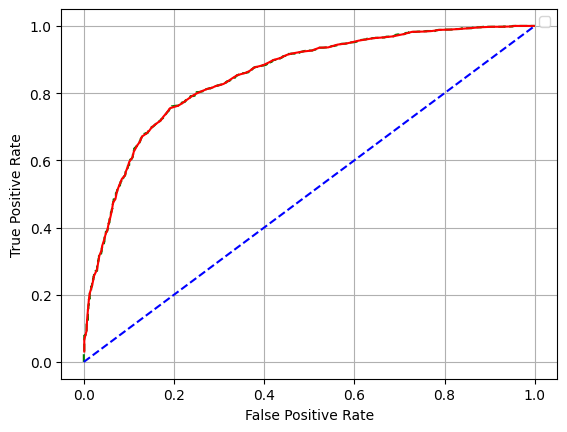

In [ ]:
#Сравнение
plt.plot(fpr_values1, tpr_values1, 'g--')
plt.plot(fpr_values2, tpr_values2, 'r')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

Построение графика Precision-Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

#Рассчет Precision и Recall
def calculate_precision_recall(y_true, y_scores, thresholds):
    precisions = []
    recalls = []

    for threshold in thresholds:
        preds = (y_scores >= threshold).astype(int)
        precision = precision_score(y_true, preds)
        recall = recall_score(y_true, preds)
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

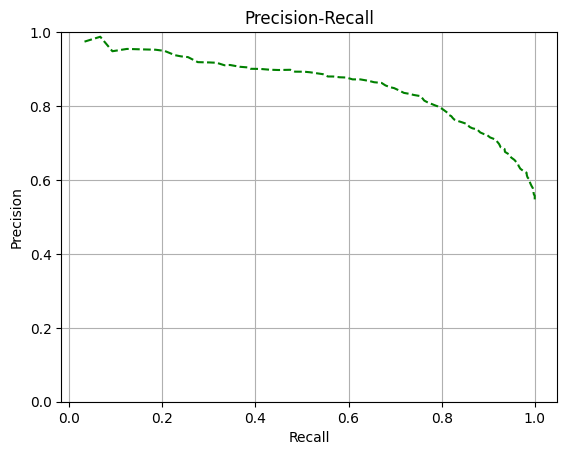

In [ ]:
precisions, recalls = calculate_precision_recall(y_test, y_scores, thresholds)

plt.plot(recalls, precisions, 'g--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0, 1.0)
plt.title('Precision-Recall')
plt.grid()
plt.show()

Вычисление значения ROC-AUC метрики вручную

In [ ]:
#Определенный интеграл ROC-кривой через np.trapz
score = np.abs(np.trapz(y=tpr_values2, x=fpr_values2))
print(score)

0.8483744970025457
